In [ ]:
import pandas as pd

In [ ]:
df=pd.read_csv('/content/owid-covid-data.csv',header=None)
df.head()

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (4,5,6,7,8,9,10,11,12,13,14,15,16,17,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33
0,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,tests_units,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
1,AFG,Asia,Afghanistan,2019-12-31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
2,AFG,Asia,Afghanistan,2020-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
3,AFG,Asia,Afghanistan,2020-01-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
4,AFG,Asia,Afghanistan,2020-01-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83


In [ ]:
df.columns=df.iloc[0]
df=df[1:]

In [ ]:
df.head()

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,tests_units,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
1,AFG,Asia,Afghanistan,2019-12-31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
2,AFG,Asia,Afghanistan,2020-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
3,AFG,Asia,Afghanistan,2020-01-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
4,AFG,Asia,Afghanistan,2020-01-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
5,AFG,Asia,Afghanistan,2020-01-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83


In [ ]:
df.location.unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Anguilla', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bermuda', 'Bhutan', 'Bolivia', 'Bonaire Sint Eustatius and Saba',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'British Virgin Islands', 'Brunei', 'Bulgaria', 'Burkina Faso',
       'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde',
       'Cayman Islands', 'Central African Republic', 'Chad', 'Chile',
       'China', 'Colombia', 'Comoros', 'Congo', 'Costa Rica',
       "Cote d'Ivoire", 'Croatia', 'Cuba', 'Curacao', 'Cyprus',
       'Czech Republic', 'Democratic Republic of Congo', 'Denmark',
       'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Ethiopia', 'Faeroe Islands', 'Falkland Isla

In [ ]:
df.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'total_deaths', 'new_deaths', 'total_cases_per_million',
       'new_cases_per_million', 'total_deaths_per_million',
       'new_deaths_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand', 'tests_units',
       'stringency_index', 'population', 'population_density', 'median_age',
       'aged_65_older', 'aged_70_older', 'gdp_per_capita', 'extreme_poverty',
       'cardiovasc_death_rate', 'diabetes_prevalence', 'female_smokers',
       'male_smokers', 'handwashing_facilities', 'hospital_beds_per_thousand',
       'life_expectancy'],
      dtype='object', name=0)

In [ ]:
df=df[df["location"]=="India"]

In [ ]:
df.head()

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,tests_units,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
13428,IND,Asia,India,2019-12-31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1380004385.0,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66
13429,IND,Asia,India,2020-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1380004385.0,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66
13430,IND,Asia,India,2020-01-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1380004385.0,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66
13431,IND,Asia,India,2020-01-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1380004385.0,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66
13432,IND,Asia,India,2020-01-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1380004385.0,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66


In [ ]:
drop=[]
for i in df.columns:
  if(len(df[i].unique())==1):
    drop.append(i)
    print(df[i].unique())

['IND']
['Asia']
['India']
['1380004385.0']
['450.419']
['28.2']
['5.989']
['3.414']
['6426.674']
['21.2']
['282.28']
['10.39']
['1.9']
['20.6']
['59.55']
['0.53']
['69.66']


In [ ]:
df=df.drop(drop,axis=1)

In [ ]:
df.columns

Index(['date', 'total_cases', 'new_cases', 'total_deaths', 'new_deaths',
       'total_cases_per_million', 'new_cases_per_million',
       'total_deaths_per_million', 'new_deaths_per_million', 'total_tests',
       'new_tests', 'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand', 'tests_units',
       'stringency_index'],
      dtype='object', name=0)

In [ ]:
df.head()

,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,tests_units,stringency_index
13428,2019-12-31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13429,2020-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
13430,2020-01-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
13431,2020-01-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
13432,2020-01-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0


In [ ]:
for i in df.columns:
  if((df[i]=='0.0').mean()>.5):
    print(i)
  if((df[i].isnull()).mean()>.5):
    print(i)

In [ ]:
import datetime as dt
df["date"]=pd.to_datetime(df["date"])
df["date"]=df["date"].map(dt.datetime.toordinal)

In [ ]:
for i in df.columns:
    print(len(df[i].unique()))
    print(df[i].unique())

205
[737424 737425 737426 737427 737428 737429 737430 737431 737432 737433
 737434 737435 737436 737437 737438 737439 737440 737441 737442 737443
 737444 737445 737446 737447 737448 737449 737450 737451 737452 737453
 737454 737455 737456 737457 737458 737459 737460 737461 737462 737463
 737464 737465 737466 737467 737468 737469 737470 737471 737472 737473
 737474 737475 737476 737477 737478 737479 737480 737481 737482 737483
 737484 737485 737486 737487 737488 737489 737490 737491 737492 737494
 737495 737496 737497 737498 737499 737500 737501 737502 737503 737504
 737505 737506 737507 737508 737509 737510 737511 737512 737513 737514
 737515 737516 737517 737518 737519 737520 737521 737522 737523 737524
 737525 737526 737527 737528 737529 737530 737531 737532 737533 737534
 737535 737536 737537 737538 737539 737540 737541 737542 737543 737544
 737545 737546 737547 737548 737549 737550 737551 737552 737553 737554
 737555 737556 737557 737558 737559 737560 737561 737562 737563 737564
 7

In [ ]:
df.tests_units.isnull().mean()
df.tests_units.unique()

array([nan, 'samples tested'], dtype=object)

In [ ]:
df.dtypes

0
date                                int64
total_cases                        object
new_cases                          object
total_deaths                       object
new_deaths                         object
total_cases_per_million            object
new_cases_per_million              object
total_deaths_per_million           object
new_deaths_per_million             object
total_tests                        object
new_tests                          object
total_tests_per_thousand           object
new_tests_per_thousand             object
new_tests_smoothed                 object
new_tests_smoothed_per_thousand    object
tests_units                        object
stringency_index                   object
dtype: object

In [ ]:
for i in df.columns:
  if(i!="tests_units"):
    df[i]=df[i].astype("float")

In [ ]:
df.dtypes

0
date                               float64
total_cases                        float64
new_cases                          float64
total_deaths                       float64
new_deaths                         float64
total_cases_per_million            float64
new_cases_per_million              float64
total_deaths_per_million           float64
new_deaths_per_million             float64
total_tests                        float64
new_tests                          float64
total_tests_per_thousand           float64
new_tests_per_thousand             float64
new_tests_smoothed                 float64
new_tests_smoothed_per_thousand    float64
tests_units                         object
stringency_index                   float64
dtype: object

In [ ]:
import numpy as np

In [ ]:
df.head()

,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,tests_units,stringency_index
13428,737424.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13429,737425.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
13430,737426.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
13431,737427.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
13432,737428.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0


In [ ]:
df.tests_units=df.replace({"tests_units" : { 'samples tested' : 1.0, np.nan : 0.0 }})

In [ ]:
df.fillna(0, inplace=True)

In [ ]:
df.dtypes

0
date                               float64
total_cases                        float64
new_cases                          float64
total_deaths                       float64
new_deaths                         float64
total_cases_per_million            float64
new_cases_per_million              float64
total_deaths_per_million           float64
new_deaths_per_million             float64
total_tests                        float64
new_tests                          float64
total_tests_per_thousand           float64
new_tests_per_thousand             float64
new_tests_smoothed                 float64
new_tests_smoothed_per_thousand    float64
tests_units                        float64
stringency_index                   float64
dtype: object

In [ ]:
df=df.drop(["tests_units"],axis=1)

In [ ]:
df

,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,stringency_index
13428,737424.0,0.0,0.0,0.0,0.0,0.000,0.000,0.000,0.000,0.0,0.0,0.000,0.000,0.0,0.000,0.0
13429,737425.0,0.0,0.0,0.0,0.0,0.000,0.000,0.000,0.000,0.0,0.0,0.000,0.000,0.0,0.000,0.0
13430,737426.0,0.0,0.0,0.0,0.0,0.000,0.000,0.000,0.000,0.0,0.0,0.000,0.000,0.0,0.000,0.0
13431,737427.0,0.0,0.0,0.0,0.0,0.000,0.000,0.000,0.000,0.0,0.0,0.000,0.000,0.0,0.000,0.0
13432,737428.0,0.0,0.0,0.0,0.0,0.000,0.000,0.000,0.000,0.0,0.0,0.000,0.000,0.0,0.000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13628,737625.0,1077618.0,38902.0,26816.0,543.0,780.880,28.190,19.432,0.393,13791869.0,358127.0,9.994,0.260,314959.0,0.228,0.0
13629,737626.0,1118043.0,40425.0,27497.0,681.0,810.174,29.293,19.925,0.493,14047908.0,256039.0,10.180,0.186,320236.0,0.232,0.0
13630,737627.0,1155191.0,37148.0,28084.0,587.0,837.092,26.919,20.351,0.425,14381303.0,333395.0,10.421,0.242,326971.0,0.237,0.0
13631,737628.0,1192915.0,37724.0,28732.0,648.0,864.428,27.336,20.820,0.470,14724546.0,343243.0,10.670,0.249,330269.0,0.239,0.0


In [ ]:
X=df.drop(["total_cases"],axis=1)
y=df["total_cases"]

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

###Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train, y_train)

In [ ]:
y_pred=reg.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred.round())

0.7580645161290323

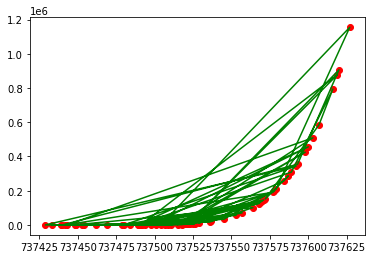

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(X_test.date,y_pred.round(),color="red")
plt.plot(X_test.date,y_test,color="green")

###Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
regr = RandomForestRegressor(n_estimators = 100, random_state = 0)
regr.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [ ]:
y_pred=regr.predict(X_test)

In [ ]:
y_pred

array([0.00000000e+00, 0.00000000e+00, 6.96552000e+03, 6.63369700e+04,
       3.61900000e+01, 3.10976000e+03, 2.30370560e+05, 2.83107020e+05,
       1.56165850e+05, 5.94860820e+05, 7.91688310e+05, 3.13460170e+05,
       4.81600000e+01, 4.68622580e+05, 9.77900000e+01, 1.71287180e+05,
       0.00000000e+00, 5.04510000e+02, 7.37250000e+02, 1.27006460e+05,
       3.00000000e+00, 8.91495000e+03, 6.28503000e+03, 1.59000000e+00,
       2.00000000e-02, 0.00000000e+00, 3.53361600e+05, 8.92778260e+05,
       3.82111000e+03, 8.24598460e+05, 3.06100000e+01, 3.27593100e+04,
       2.16787960e+05, 1.12412996e+06, 2.26400000e+02, 5.65400000e+01,
       1.38603580e+05, 3.00000000e+00, 3.00000000e+00, 5.16910000e+02,
       1.48064730e+05, 2.81700000e+01, 1.95195300e+04, 1.93833940e+05,
       4.62181000e+03, 3.00000000e+00, 0.00000000e+00, 9.97688700e+04,
       1.82208500e+04, 9.00000000e-02, 0.00000000e+00, 5.09607910e+05,
       1.19941000e+03, 4.17547800e+05, 2.86013000e+03, 0.00000000e+00,
      

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred.round())

0.24193548387096775

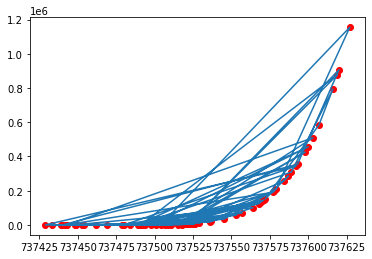

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(X_test.date,y_pred.round(),color="red")
plt.plot(X_test.date,y_test)